In [2]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

from sklearn import preprocessing, utils, tree, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn. metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
#    Завдання 1 Завантаження даних. виведення назв колонок та розміру датасету #

In [4]:
file = "googleplaystore.csv"
dataset = pd.read_csv(file)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
print(dataset.shape)

(10841, 13)


In [ ]:
#    Завдання 2: Опрацювання пропусків#

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
dataset.loc[:, 'Installs'] = dataset['Installs'].astype(str).str.replace('[+,]', '', regex=True)
dataset.loc[:, 'Installs'] = pd.to_numeric(dataset['Installs'], errors='coerce')
dataset.loc[:, 'Installs'] = dataset['Installs'].fillna(dataset['Installs'].median())

dataset.loc[:, 'Size'] = dataset['Size'].astype(str)
dataset.loc[:, 'Size'] = dataset['Size'].replace('Varies with device', np.nan)
dataset.loc[:, 'Size'] = dataset['Size'].str.replace('M', 'e6').str.replace('k', 'e3')
dataset.loc[:, 'Size'] = pd.to_numeric(dataset['Size'], errors='coerce')
dataset.loc[:, 'Size'] = dataset['Size'].fillna(dataset['Size'].median())

dataset.loc[:, 'Price'] = dataset['Price'].astype(str).str.replace('$', '', regex=True)
dataset.loc[:, 'Price'] = pd.to_numeric(dataset['Price'], errors='coerce')
dataset.loc[:, 'Price'] = dataset['Price'].fillna(0)

dataset.loc[:, 'Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')
dataset.loc[:, 'Rating'] = dataset['Rating'].fillna(dataset['Rating'].median())

dataset = dataset.dropna(subset=['Current Ver', 'Android Ver']).copy()

dataset.loc[:, 'Type'] = dataset['Type'].fillna('Free')
dataset.loc[:, 'Content Rating'] = dataset['Content Rating'].fillna(dataset['Content Rating'].mode()[0])

C:\Users\Dmytrik\AppData\Local\Temp\ipykernel_17328\4083411607.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.loc[:, 'Installs'] = dataset['Installs'].fillna(dataset['Installs'].median())
C:\Users\Dmytrik\AppData\Local\Temp\ipykernel_17328\4083411607.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.loc[:, 'Size'] = dataset['Size'].fillna(dataset['Size'].median())
C:\Users\Dmytrik\AppData\Local\Temp\ipykernel_17328\4083411607.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will cha

In [8]:
#    Завдання 3 Візуалізfація даних: побудувати графік (heatmap), що відображає кореляції
# ознак між собою і з цільовою змінною (розміткою); побудувати гістограми
# розподілу ознак і boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато
# обмежитися декількома)

In [ ]:
#  HEATMAP #

<Axes: >

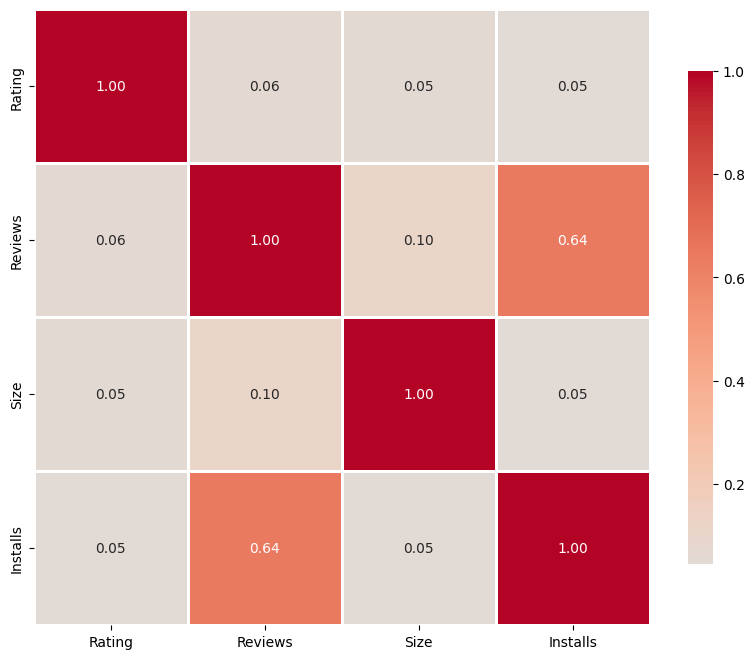

In [9]:
numeric_dataset = dataset[['Rating', 'Reviews', 'Size', 'Installs']]

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_dataset.corr(), 
    annot=True,           
    fmt='.2f',            
    cmap='coolwarm',      
    center=0,             
    linewidths=2, 
    linecolor='white',
    cbar_kws={'shrink': 0.8},
    square=True
)

In [ ]:
# Бохплоти #

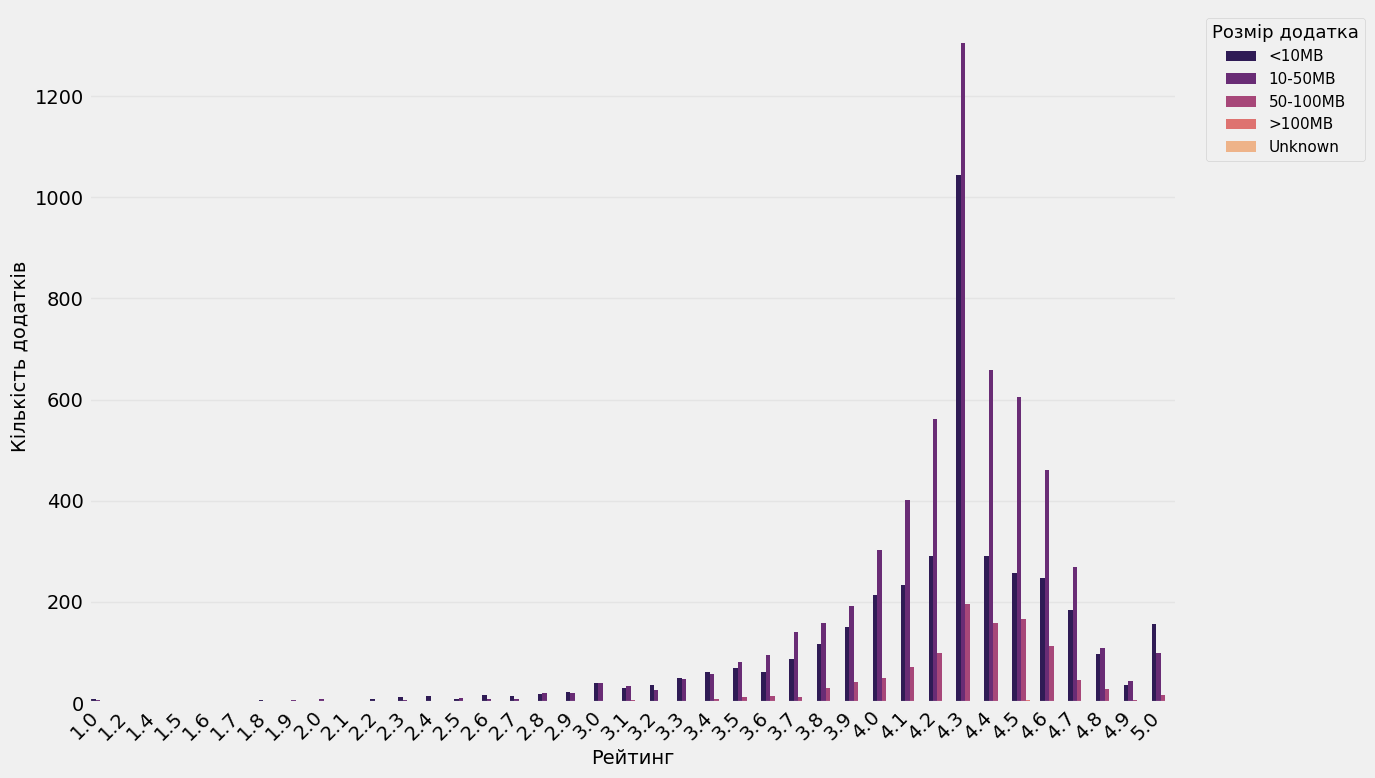

In [21]:
# Rating vs Size 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')

def categorize_size(size):
    if pd.isna(size):
        return 'Unknown'
    elif size < 10_000_000:   
        return '<10MB'
    elif size < 50_000_000:   
        return '10-50MB'
    elif size < 100_000_000:  
        return '50-100MB'
    else:
        return '>100MB'

dataset['Size_Category'] = dataset['Size'].apply(categorize_size)

ax = sns.countplot(
    data=dataset,
    x='Rating',
    hue='Size_Category',
    palette='magma',
    order=sorted(dataset['Rating'].dropna().unique()),
    hue_order=['<10MB', '10-50MB', '50-100MB', '>100MB', 'Unknown']
)

plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Кількість додатків', fontsize=14)

plt.legend(title='Розмір додатка', title_fontsize=13, fontsize=11, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=45, ha='right')

# Сітка для краси
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

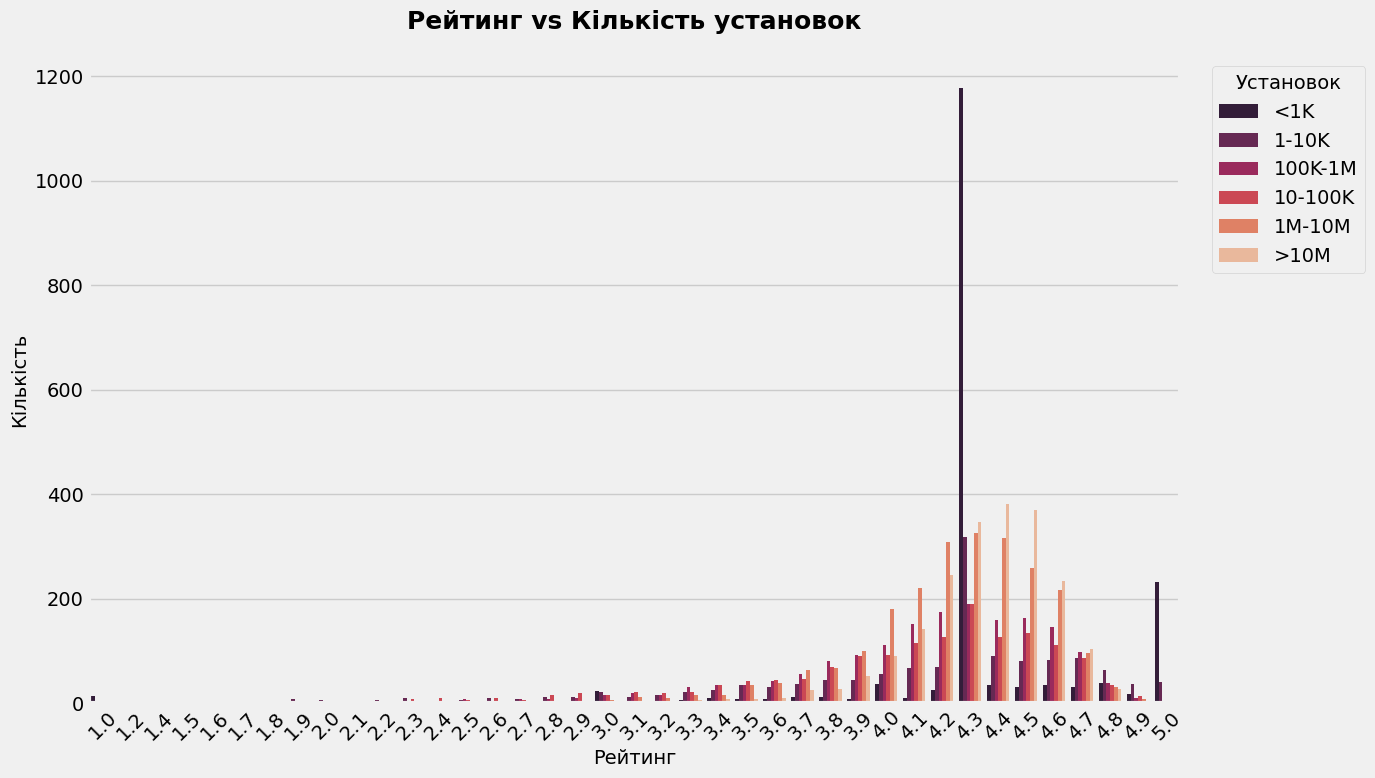

In [ ]:
#Графік  Rating vs Кількість установок 
def installs_cat(i):
    if i < 1_000: return '<1K'
    elif i < 10_000: return '1-10K'
    elif i < 100_000: return '10-100K'
    elif i < 1_000_000: return '100K-1M'
    elif i < 10_000_000: return '1M-10M'
    else: return '>10M'

dataset['Installs_Category'] = dataset['Installs'].apply(installs_cat)

plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')

sns.countplot(
    data=dataset,
    x='Rating',
    hue='Installs_Category',
    palette='rocket'
)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Установок', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

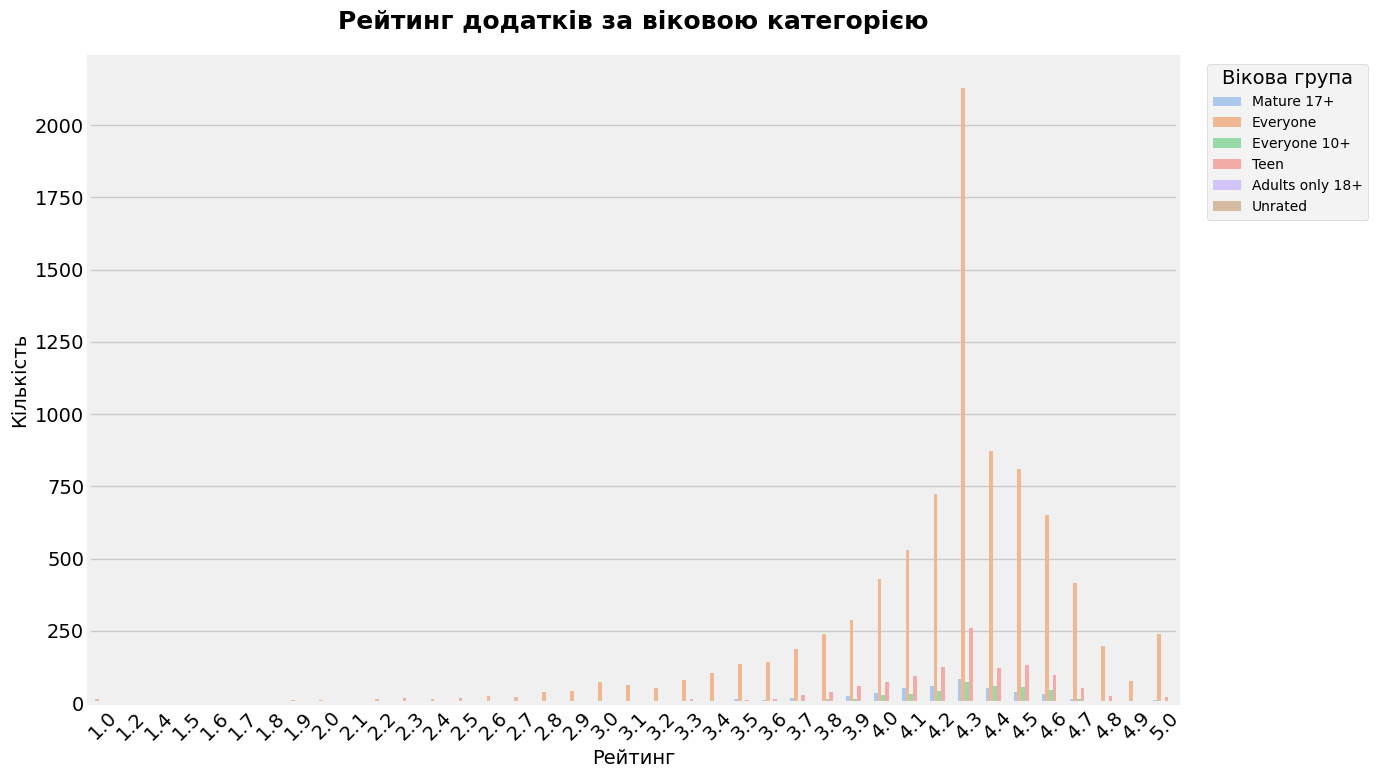

In [10]:
plt.figure(figsize=(14, 8))
plt.style.use('fivethirtyeight')

sns.countplot(
    data=dataset,
    x='Rating',
    hue='Content Rating',
    palette='pastel'
)

plt.title('Рейтинг додатків за віковою категорією', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Рейтинг', fontsize=14)
plt.ylabel('Кількість', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Вікова група', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
#    Завдання 4 Нормалізувати дані  #

In [15]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
numeric_data = dataset[numeric_columns]

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(numeric_data)

scaled_dataset = pd.DataFrame(scaled_array, columns=numeric_columns, index=dataset.index)
scaled_full_dataset = pd.concat([dataset.drop(numeric_columns, axis=1), scaled_dataset], axis=1)

scaled_dataset.head(10)

,Rating,Reviews,Size,Installs,Price
0,0.775,0.000002,0.189931,0.00001,0.0
1,0.725,0.000012,0.139927,0.00050,0.0
2,0.925,0.001120,0.086922,0.00500,0.0
3,0.875,0.002759,0.249936,0.05000,0.0
4,0.825,0.000012,0.027917,0.00010,0.0
5,0.850,0.000002,0.055920,0.00005,0.0
6,0.700,0.000002,0.189931,0.00005,0.0
7,0.775,0.000471,0.289940,0.00100,0.0
8,0.850,0.000176,0.329943,0.00100,0.0
9,0.925,0.000002,0.030918,0.00001,0.0


In [21]:
#    TASK 5 Learning    #

In [ ]:
#splitting the model
X = scaled_dataset.drop('Rating', axis=1)
y = scaled_dataset['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [23]:
#    TASK 5.1 kNN    #

In [ ]:
X = dataset[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

y = dataset['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Підбір найкращого K ---
accuracy = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))

# Найкраще K
best_k = k_range[accuracy.index(max(accuracy))]
print(f"Найкраща точність: {max(accuracy):.4f} при K = {best_k}")
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy, marker='o', linewidth=2, markersize=6, color='royalblue')
plt.axvline(best_k, color='red', linestyle='--', label=f'Найкраще K = {best_k}')
plt.title('Залежність точності kNN від кількості сусідів (K)', fontsize=16, fontweight='bold')
plt.xlabel('Кількість сусідів (K)')
plt.ylabel('Точність (Accuracy)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_scaled, y_train)
y_pred = knn_final.predict(X_test_scaled)

print(f"Фінальна модель: K = {best_k}")
print(f"Точність на тестовій вибірці: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix (перші 10 класів):")
cm = confusion_matrix(y_test, y_pred)
print(cm.diagonal()[:10])  # діагональ — правильно класифіковані

Фінальна модель: K = 1
Точність на тестовій вибірці: 0.2558

Classification Report:
                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.10      0.08      0.09        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.11      0.09      0.10        46
           BUSINESS       0.18      0.20      0.19        92
             COMICS       0.11      0.08      0.10        12
      COMMUNICATION       0.26      0.26      0.26        77
             DATING       0.46      0.53      0.50        47
          EDUCATION       0.35      0.39      0.37        31
      ENTERTAINMENT       0.52      0.53      0.52        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.27      0.26      0.26       394
            FINANCE       0.21      0.21      0.21        73
     FOOD_AND_DRINK       0.15      0.20      0.17        25


In [ ]:
#    Дерево ухвалення рішень    #

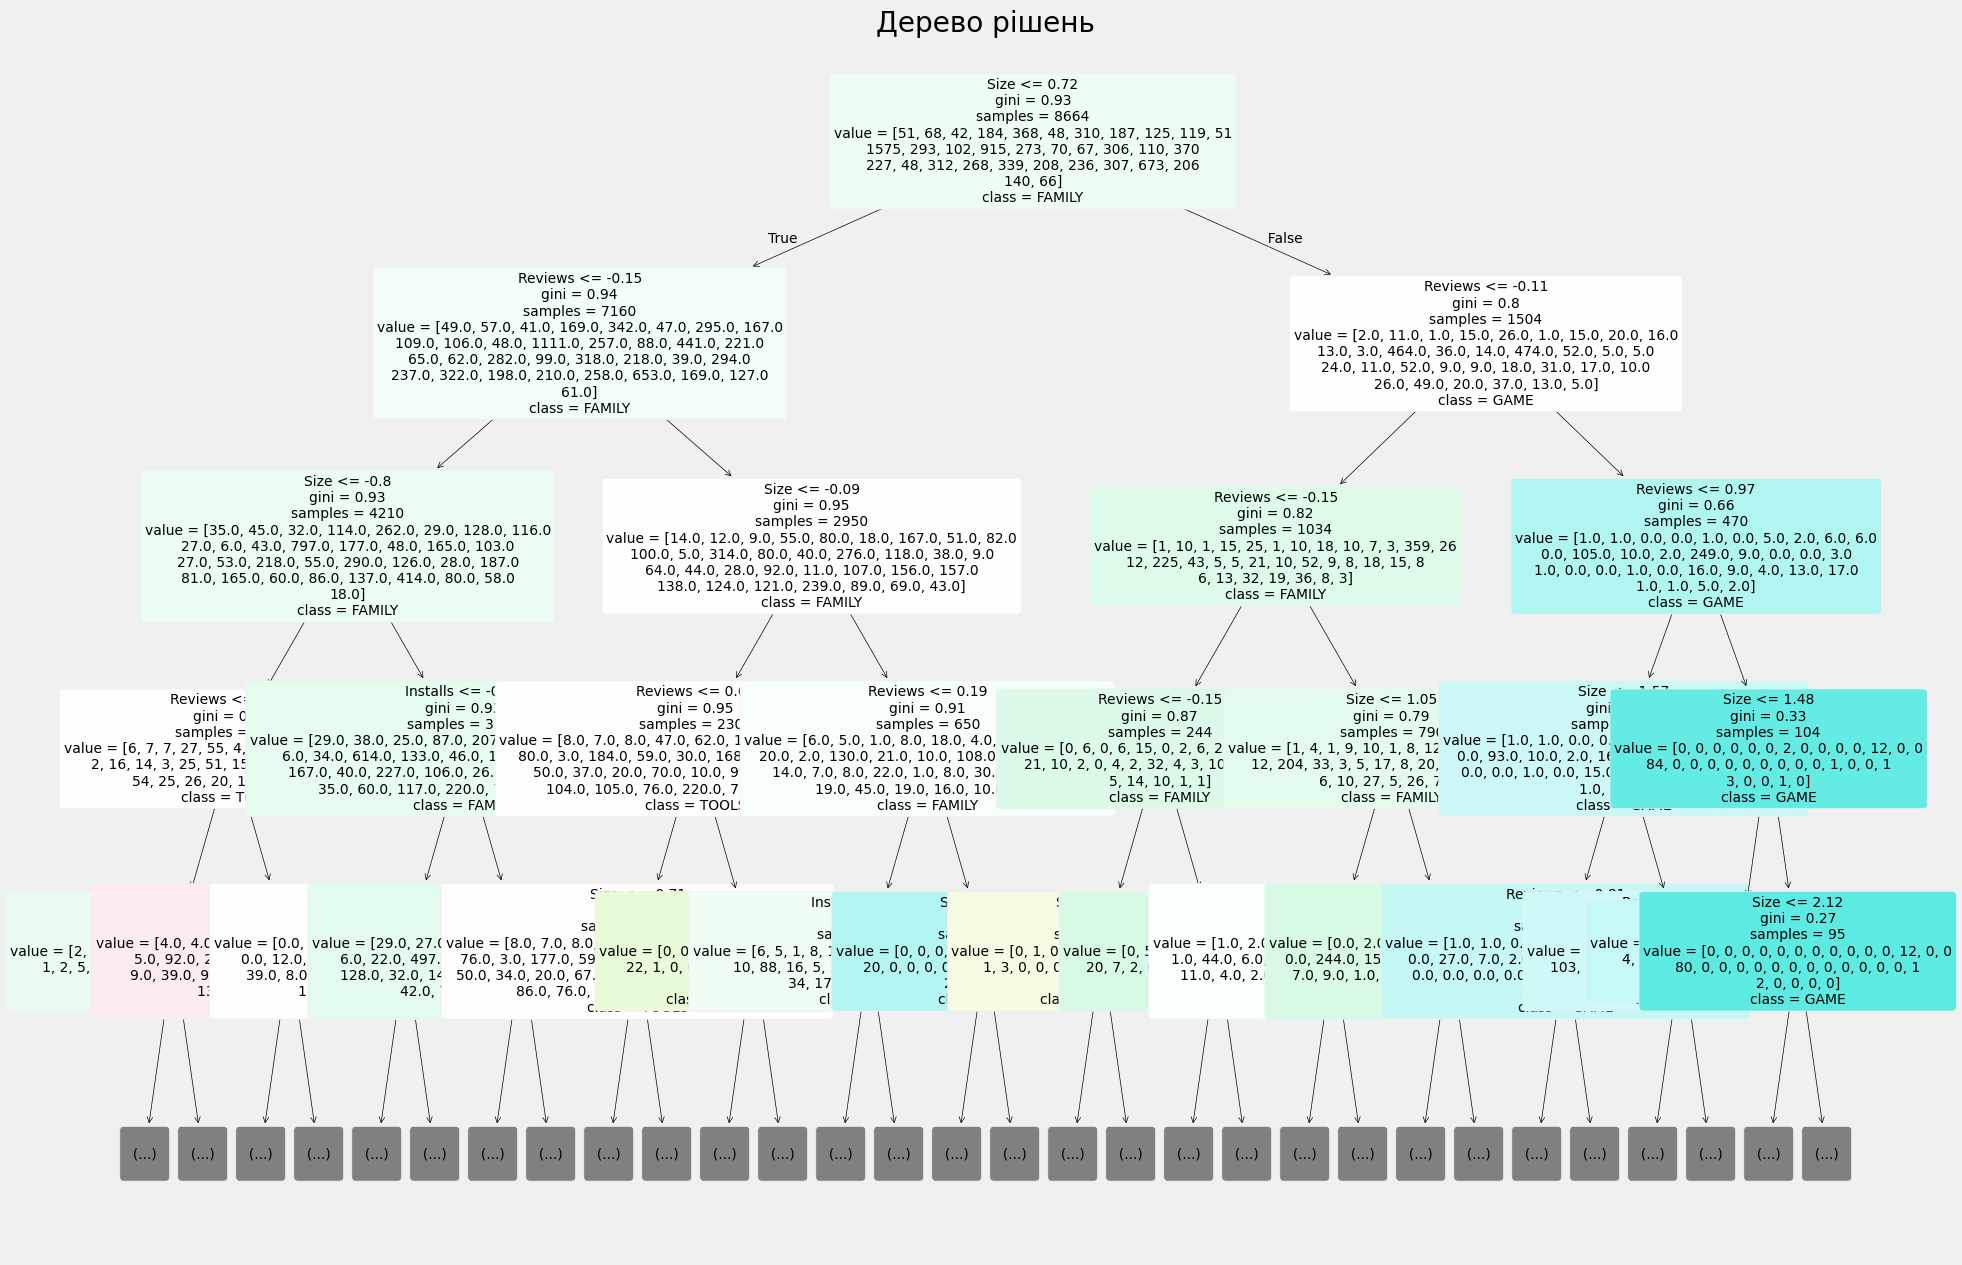

In [30]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)
plt.figure(figsize=(20,15))
plot_tree(decision_tree,
          feature_names=['Rating', 'Reviews', 'Size', 'Installs', 'Price'],
          class_names=sorted(dataset['Category'].unique()),
          filled=True,
          rounded=True,
          fontsize=10,
          max_depth=4,
          precision=2)
plt.title('Дерево рішень')
plt.show()

In [31]:
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.00      0.00      0.00        46
           BUSINESS       0.12      0.14      0.13        92
             COMICS       0.00      0.00      0.00        12
      COMMUNICATION       0.19      0.12      0.14        77
             DATING       0.00      0.00      0.00        47
          EDUCATION       0.17      0.06      0.09        31
      ENTERTAINMENT       0.62      0.17      0.26        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.22      0.58      0.32       394
            FINANCE       0.17      0.03      0.05        73
     FOOD_AND_DRINK       0.50      0.08      0.14        25
               GAME       0.33      0.29      0.31       229
 HEALTH_AND_FITNESS    

C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics

In [ ]:
#    SVM    #

In [32]:
svm_alg = svm.SVC()
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.00      0.00      0.00        46
           BUSINESS       0.00      0.00      0.00        92
             COMICS       0.00      0.00      0.00        12
      COMMUNICATION       0.14      0.16      0.15        77
             DATING       0.00      0.00      0.00        47
          EDUCATION       0.00      0.00      0.00        31
      ENTERTAINMENT       0.00      0.00      0.00        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.19      0.97      0.32       394
            FINANCE       0.00      0.00      0.00        73
     FOOD_AND_DRINK       0.00      0.00      0.00        25
               GAME       0.45      0.17      0.25       229
 HEALTH_AND_FITNESS    

C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics

In [ ]:
#    Random forest    #

In [33]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.12      0.09      0.10        46
           BUSINESS       0.16      0.18      0.17        92
             COMICS       0.33      0.08      0.13        12
      COMMUNICATION       0.48      0.26      0.34        77
             DATING       0.50      0.53      0.52        47
          EDUCATION       0.35      0.39      0.37        31
      ENTERTAINMENT       0.46      0.53      0.49        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.26      0.39      0.31       394
            FINANCE       0.29      0.23      0.26        73
     FOOD_AND_DRINK       0.23      0.24      0.24        25
               GAME       0.46      0.46      0.46       229
 HEALTH_AND_FITNESS    

In [34]:
#    AdaBoost    #

In [35]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.00      0.00      0.00        46
           BUSINESS       0.00      0.00      0.00        92
             COMICS       0.00      0.00      0.00        12
      COMMUNICATION       0.17      0.12      0.14        77
             DATING       0.00      0.00      0.00        47
          EDUCATION       0.00      0.00      0.00        31
      ENTERTAINMENT       0.00      0.00      0.00        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.20      0.71      0.31       394
            FINANCE       0.00      0.00      0.00        73
     FOOD_AND_DRINK       0.00      0.00      0.00        25
               GAME       0.20      0.52      0.29       229
 HEALTH_AND_FITNESS    

C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics

In [ ]:
#    Оптимальні параметри    #

In [ ]:
#    Підбір оптимальних параметрів для KNN   #

Найкраща точність: 0.2558 при K = 1


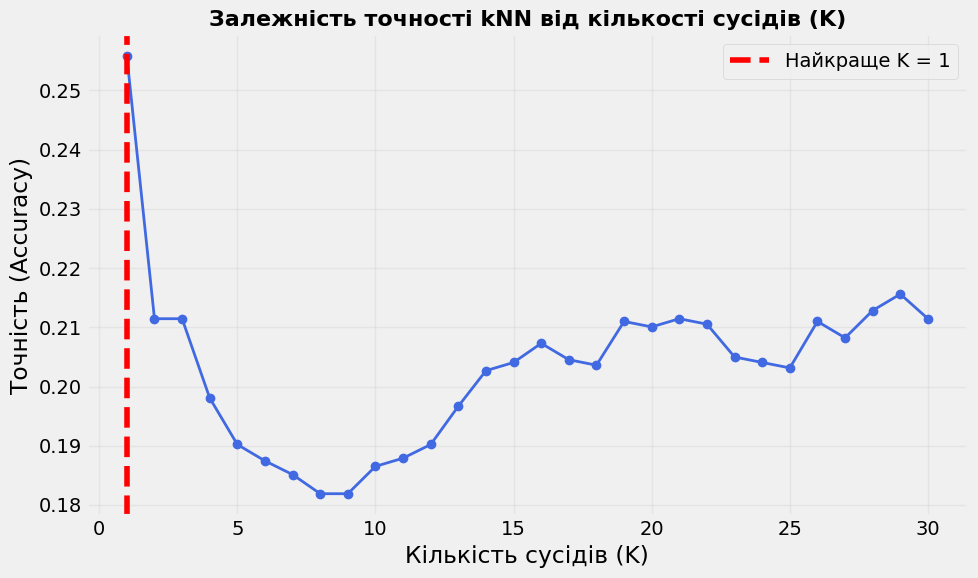

In [39]:
# --- Підбір найкращого K ---
accuracy = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))

# Найкраще K
best_k = k_range[accuracy.index(max(accuracy))]
print(f"Найкраща точність: {max(accuracy):.4f} при K = {best_k}")
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy, marker='o', linewidth=2, markersize=6, color='royalblue')
plt.axvline(best_k, color='red', linestyle='--', label=f'Найкраще K = {best_k}')
plt.title('Залежність точності kNN від кількості сусідів (K)', fontsize=16, fontweight='bold')
plt.xlabel('Кількість сусідів (K)')
plt.ylabel('Точність (Accuracy)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors = accuracy.index(max(accuracy))+1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.10      0.09      0.09        46
           BUSINESS       0.19      0.23      0.21        92
             COMICS       0.07      0.08      0.07        12
      COMMUNICATION       0.32      0.30      0.31        77
             DATING       0.39      0.51      0.44        47
          EDUCATION       0.36      0.39      0.38        31
      ENTERTAINMENT       0.41      0.57      0.48        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.26      0.24      0.25       394
            FINANCE       0.15      0.18      0.16        73
     FOOD_AND_DRINK       0.20      0.24      0.22        25
               GAME       0.41      0.41      0.41       229
 HEALTH_AND_FITNESS    

In [ ]:
#    Оптимальні параметри для SVM    #

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("Найкращі параметри:")
print(grid_search.best_params_)
print(f"Найкраща точність на крос-валідації: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Найкращі параметри:
{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Найкраща точність на крос-валідації: 0.2289


In [43]:
svm_alg = svm.SVC(C=100, gamma=0.1)
svm_alg.fit(X_train, y_train)
y_pred = svm_alg.predict(X_test)
print(classification_report(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.00      0.00      0.00        46
           BUSINESS       0.29      0.16      0.21        92
             COMICS       1.00      0.08      0.15        12
      COMMUNICATION       0.65      0.14      0.23        77
             DATING       0.83      0.40      0.54        47
          EDUCATION       0.90      0.29      0.44        31
      ENTERTAINMENT       1.00      0.40      0.57        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.20      0.89      0.33       394
            FINANCE       0.25      0.07      0.11        73
     FOOD_AND_DRINK       0.60      0.12      0.20        25
               GAME       0.46      0.05      0.09       229
 HEALTH_AND_FITNESS    

C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics

In [ ]:
# Завдання №7 Відобразити sklearn.metrics.classification_report і sklearn.metrics.confusion_matrix

C:\Users\Dmytrik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


                     precision    recall  f1-score   support

     ART_AND_DESIGN       0.00      0.00      0.00        13
  AUTO_AND_VEHICLES       0.00      0.00      0.00        17
             BEAUTY       0.00      0.00      0.00        11
BOOKS_AND_REFERENCE       0.00      0.00      0.00        46
           BUSINESS       0.00      0.00      0.00        92
             COMICS       0.00      0.00      0.00        12
      COMMUNICATION       0.00      0.00      0.00        77
             DATING       0.00      0.00      0.00        47
          EDUCATION       0.00      0.00      0.00        31
      ENTERTAINMENT       0.00      0.00      0.00        30
             EVENTS       0.00      0.00      0.00        13
             FAMILY       0.18      1.00      0.31       394
            FINANCE       0.00      0.00      0.00        73
     FOOD_AND_DRINK       0.00      0.00      0.00        25
               GAME       0.00      0.00      0.00       229
 HEALTH_AND_FITNESS    

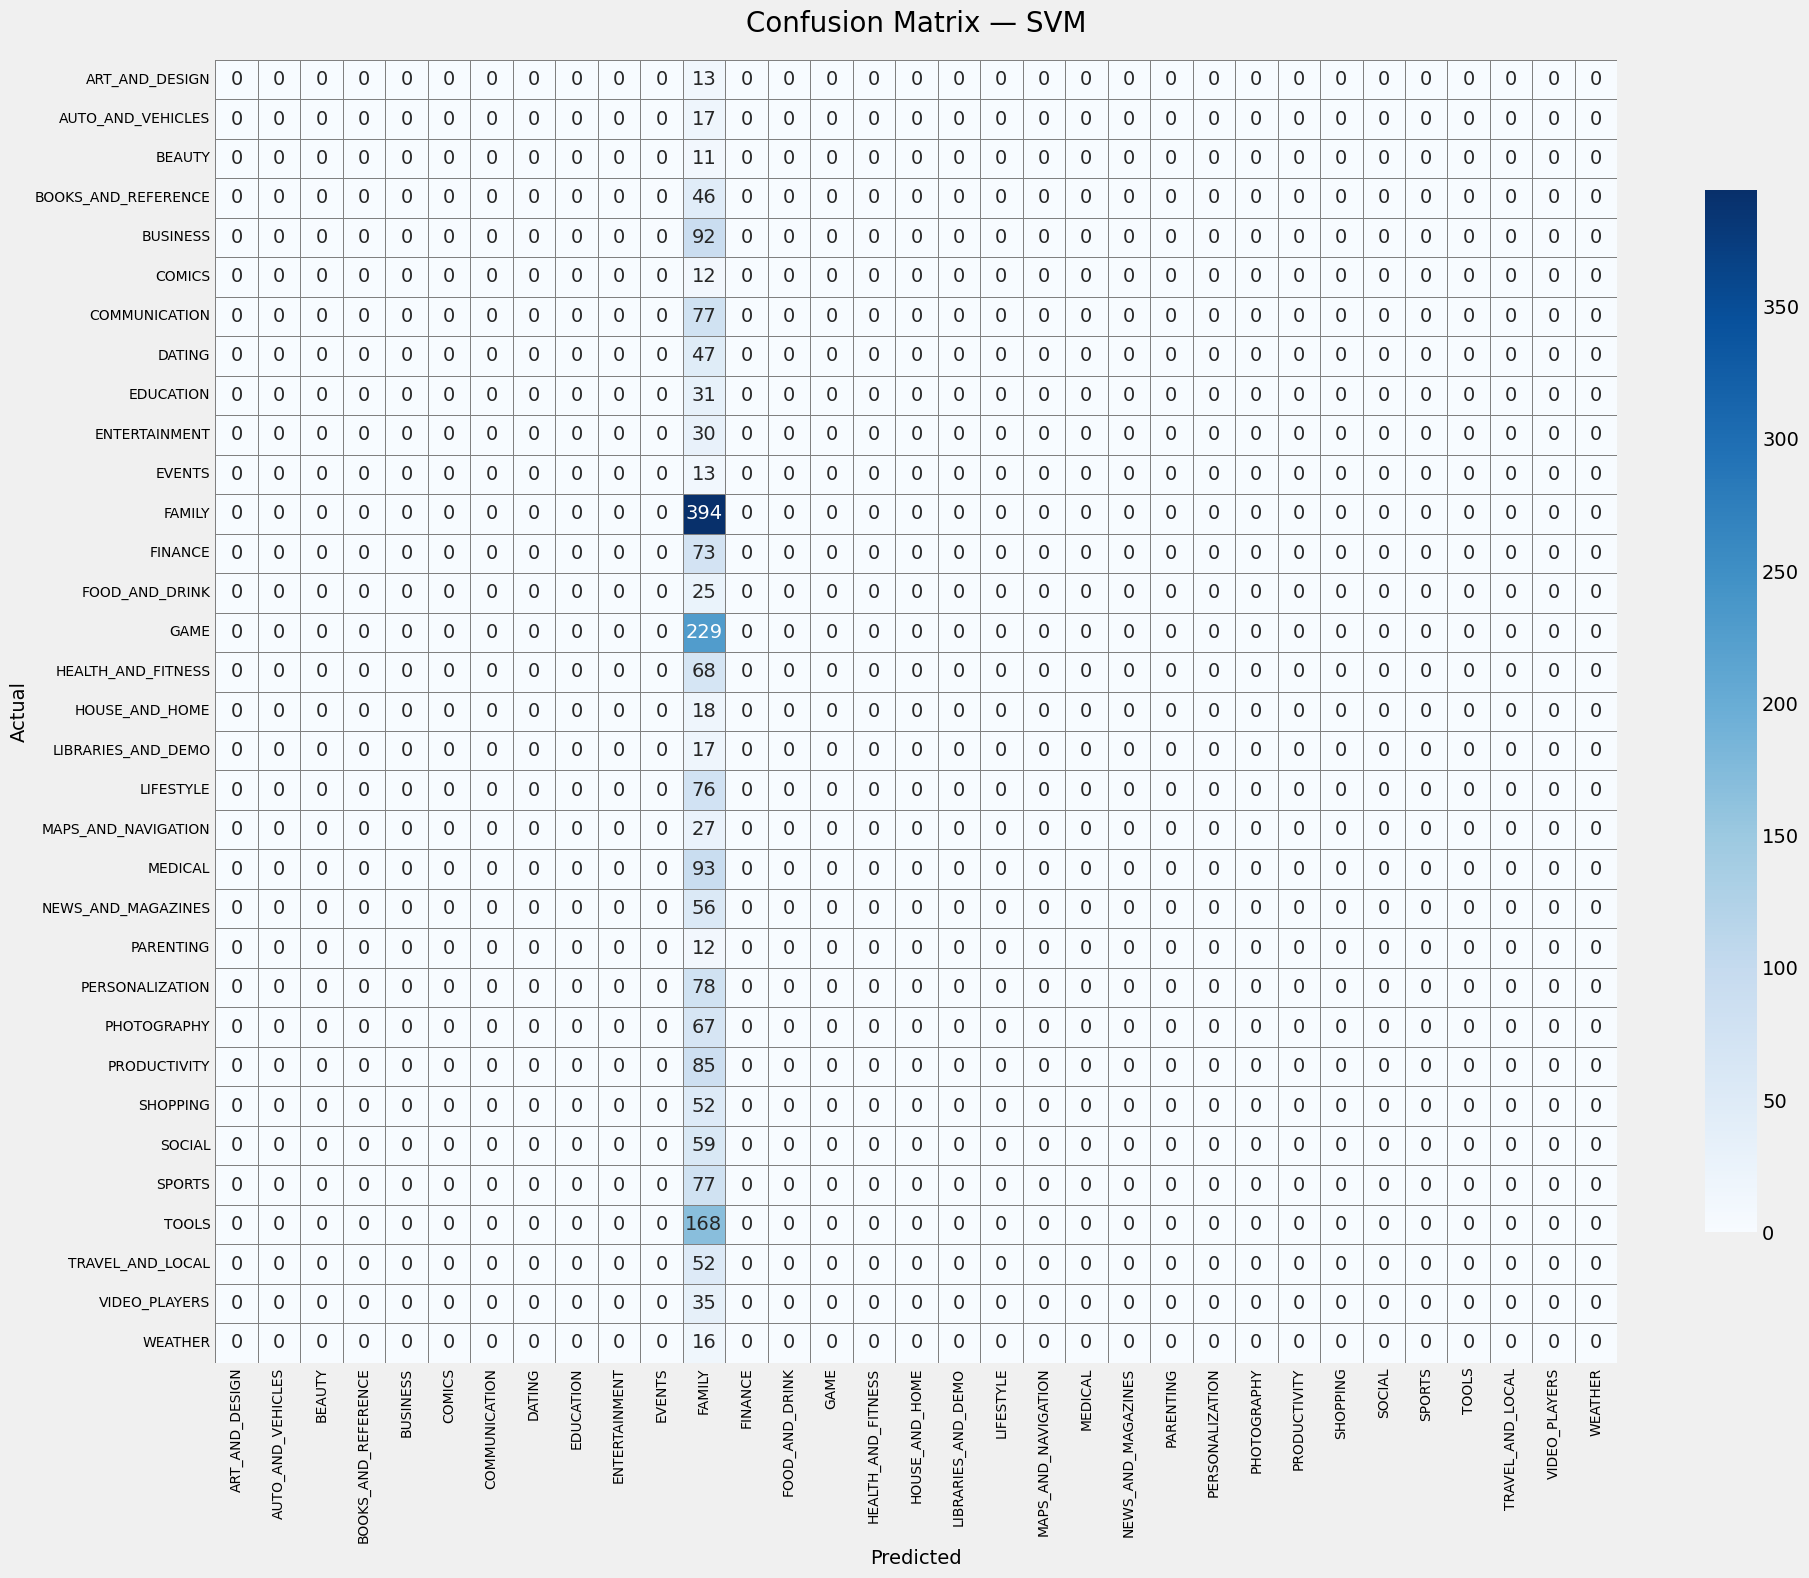

Точність: 0.1819


In [48]:
y_pred = svm_alg.predict(X_test_scaled)

print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()),
            linewidths=.5,
            linecolor='gray',
            cbar_kws={'shrink': 0.8})

plt.title('Confusion Matrix — SVM', fontsize=20, pad=20)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print(f"Точність: {accuracy_score(y_test, y_pred):.4f}")